<a href="https://colab.research.google.com/github/Yunho-seo/education_center_work/blob/main/%EC%84%9C%EC%9C%A4%ED%98%B8_20230509_%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [22]:
path = '/content/drive/MyDrive/services.csv'
complaints = pd.read_csv(path)
complaints.head(2)

<ipython-input-22-8a070ebc7d57>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv(path)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"


In [9]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [47]:
# 문제
# 1) 불평의 종류(중복되지 않는)와 불평의 종류별 개수를 출력
complaints['Complaint Type'].unique().shape # 165가지
complaints['Complaint Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

In [54]:
# 2) 불평의 상위 10개를 출력 (sort_values)
complaints['Complaint Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

<Axes: >

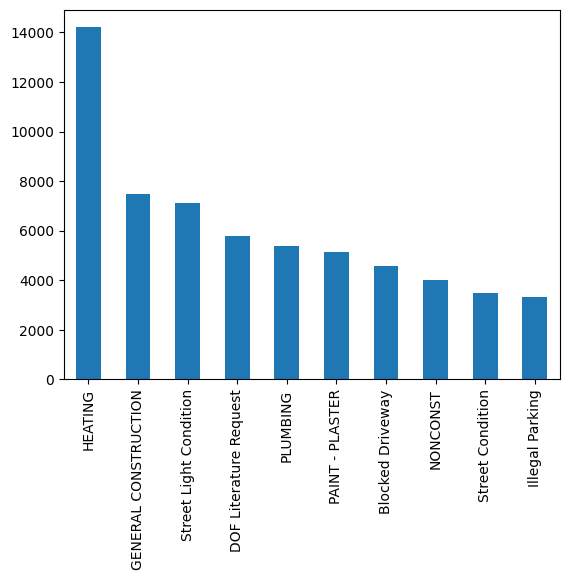

In [55]:
# 3) 불평의 상위 10개를 bar 형태로 출력
complaints['Complaint Type'].value_counts().head(10).plot.bar()

In [57]:
# 4) 거주지별 불평의 개수 확인
complaints['City']
complaints.groupby('City')['Complaint Type'].value_counts()

City      Complaint Type                
ARVERNE   Noise - House of Worship          4
          Blocked Driveway                  2
          Consumer Complaint                2
          Illegal Parking                   2
          Noise - Street/Sidewalk           2
                                           ..
Woodside  Unsanitary Animal Pvt Property    2
          Water Conservation                2
          APPLIANCE                         1
          Hazardous Materials               1
          Plumbing                          1
Name: Complaint Type, Length: 2793, dtype: int64

In [58]:
# 5) 거주지와 불평의 크로스테이블 생성
pd.crosstab(complaints['City'], complaints['Complaint Type'])

Complaint Type,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASTORIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
Arverne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
Astoria,11,0,4,0,0,0,2,2,0,0,...,1,0,1,0,0,2,0,16,0,0
BAYSIDE,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODHAVEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOODSIDE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Whitestone,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,13,0,0


<Axes: xlabel='Complaint Type', ylabel='Density'>

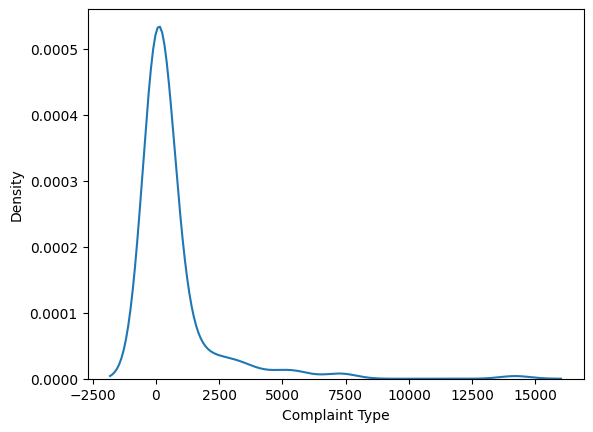

In [59]:
# 6) 불평의 종류별로 카운트한 내용을 kde로 출력
import seaborn as sns
import matplotlib.pyplot as plt

kde = complaints['Complaint Type'].value_counts()
sns.kdeplot(data = kde)

In [66]:
# 7) 소음 불평(:Noise-street/Sidewalk)이 많은 지역을 확인
complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk'].groupby('City')['Complaint Type'].count().sort_values(ascending = False).head(10)

City
NEW YORK            902
BROOKLYN            456
BRONX               292
ASTORIA              45
STATEN ISLAND        36
LONG ISLAND CITY     17
CENTRAL PARK         15
JAMAICA              14
CORONA               14
WOODHAVEN            12
Name: Complaint Type, dtype: int64

In [69]:
# 8) 소음불평이 전체 불평에서 차지하는 비율을 출력
noise_c = complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk'].groupby('City')['Complaint Type'].count().sum()
total_c = complaints['Complaint Type'].count().sum()
b = (noise_c / total_c)
print("비율: ", round((b*100), 2), "%")

비율:  1.73 %


In [75]:
# 9) 위의 데이터 내에서 유의미한 insight 정보 1개를 찾아 출력
# Blocked Driveway : 차단된 도로에 대한 불평이 가장 많은 지역?

complaints[complaints['Complaint Type'] == 'Blocked Driveway'].groupby('City')['Complaint Type'].count().sort_values(ascending = False)
# 브루클린 지역이 도로 봉쇄에 대한 불평이 가장 많다.

# 자치구
complaints[complaints['Complaint Type'] == 'Blocked Driveway'].groupby('Borough')['Complaint Type'].count().sort_values(ascending = False)
# Queens 자치구는 도로 봉쇄에 대한 불평이 가장 많은 자치구이다.

Borough
QUEENS           1890
BROOKLYN         1776
BRONX             656
MANHATTAN         157
STATEN ISLAND     111
Name: Complaint Type, dtype: int64